# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [7]:
# Import libraries and modules.
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
### YOUR CODE HERE ###
df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.
### YOUR CODE HERE ###
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library. 

</details>

### Statistical properties of the dataset

Use `pandas` library to get a better sense of the data, including range, data types, mean values, and shape. 

Review this information about the dataset by using the `pandas` library on the `df_companies` DataFrame and answering the following questions.

In [4]:
# Get the shape of the dataset.
### YOUR CODE HERE ###
df_companies.shape

(1074, 10)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Print the 'shape' of the DataFrame.

</details>

**Question: What is the shape of the dataset?**

[Write your response here. Double-click (or enter) to edit.]

In [5]:
# Get the data types and number of non-null values in the dataset.
### YOUR CODE HERE ###
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use the 'info()' method of the DataFrame.

</details>

**Question: What are the data types of various columns?**


the data type for all other columns is object, except for the Year Funded column.

**Question: How many columns contain non-null values less than the total rows in the dataset?**

- 2 columns, Columns City and Select Investors

In [6]:
# Get the range of different values in the dataset.
### YOUR CODE HERE ###
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to find descriptive statistics for the numeric columns in a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `describe()` function from the `pandas` library.

</details>

**Question: In what year was the oldest company founded?**

- By using the describe() function we can see the oldest company of the dataset was founded in 1919.

### Data preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add the `Year Joined` column to the dataset.

In [7]:
# Create a new column "Year Joined" from "Date Joined".
### YOUR CODE HERE ###
df_companies["Year_Joined"] = pd.to_datetime(df_companies["Date Joined"]).dt.year

Now, prepare the dataset to create a sum of valuations in each country. Currently, the `Valuation` is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, it is impossible to properly sum these values. To convert `Valuation` column to numeric, first remove the `$` and `B` symbols from the column and save the results to a new `Valuation_num` column. 

In [8]:
# Remove the extra characters from the Valuation column.
### YOUR CODE HERE ###
df_companies['Valuation_num']=df_companies['Valuation'].str.strip('$B')

In [9]:
# Convert the column to numeric
### YOUR CODE HERE ###
df_companies['Valuation_num']=pd.to_numeric(df_companies['Valuation_num'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Columns in different data types can be converted to numeric data type using `pd.to_numeric()`. 

</details>

### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [28]:
# Find the number of missing values in each column in this dataset.
### YOUR CODE HERE ###
df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year_Joined          0
Valuation_num        0
dtype: int64

 **Question: How many missing values are in each column in the dataset?**

- 1 value missing in the Select Investors column
- 16 values missing in the city column
- No missing values in other columns.

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`.

In [29]:
# Filter the DataFrame to only include rows with at least one missing value.
# Assign the filtered results to a variable named "df_rows_missing" and display the contents of the variable.
### YOUR CODE HERE ###
df_rows_missing=df_companies[df_companies.isna().any(axis=1)]

df_rows_missing

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Which column has the most data missing?**

- City column

### Context-specific missing values

Sometimes, there may be other types of values that are considered missing, such as empty strings and `-1`, `0`, `NaN`, and `NA`. Using one representation for all these missing values is beneficial. Replace any missing values in the dataset with `np.nan`, accessed from the `numpy` library, to simplify the missing values imputation process. 


Without replacing the original DataFrame, replace 'Asia' with `np.nan`. Then, find the number of missing values in the dataset.


In [30]:
# Find the number of missing values after replacing 'Asia' with `np.nan`.
### YOUR CODE HERE ###
df_companies.replace('Asia', np.nan).isna().sum()

Company               0
Valuation             0
Date Joined           0
Industry              0
City                 16
Country/Region        0
Continent           310
Year Founded          0
Funding               0
Select Investors      1
Year_Joined           0
Valuation_num         0
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

 Use `isna().sum()` to get the sum of missing values.

</details>

**Question: How many values went missing after changing 'Asia' with `np.nan`?**


- 310 rows/values went missing

**Question: What steps did you take to find missing data?**

- 1) Use the .isna() function from pandas to find missin values.
- 2) Determine what other types of missing values can be converted to np.nan. Then, repeat the previous step.

**Question: What observations can be made about the forms and context of missing data?**

- Missing values can take different forms and are usually context-specific
- All missing values are not necessarily labeled as `na` or `None`, or `Null`.

**Question: What other methods could you use to address missing data?**

- Another approach can be reach business users to get the proper value of missing values.

## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and missing values imputation. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable.

In [31]:
# Store the total number of values in a variable.
### YOUR CODE HERE ###
count_total = df_companies.size

Now, remove the missing values and count the total number of values in the dataset. Remove all rows containing missing values and store the total number of cells in a variable called `count_dropna_rows`.

In [32]:
# Drop the rows containing missing values. 
### YOUR CODE HERE ###
count_dropna_rows = df_companies.dropna().size

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use `dropna()` function to drop columns with missing values.

</details>

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [33]:
# Drop the columns containing missing values.
### YOUR CODE HERE ###
count_dropna_columns = df_companies.dropna(axis=1).size

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Provide `axis=1` to `dropna()` function to drop columns with missing values.

</details>

Next, print the percentage of values removed by each method and compare them.

In [34]:
# Print the percentage of values removed by dropping rows.
### YOUR CODE HERE ###
print(count_dropna_rows/count_total*100)

# Print the percentage of values removed by dropping columns.
### YOUR CODE HERE ###
print(count_dropna_columns/count_total*100)

98.4171322160149
83.33333333333334


**Question: Which method was most effective? Why?**

A significantly higher percerntage of columns than rows were removed. So, with this dataset, the columns method was more effective at removing more values.

Try the second method: imputation. Begin by filling missing values using the backfill method. Then, show the rows that previously had missing values.

In [35]:
# Fill missing values using 'backfill' method.
### YOUR CODE HERE ###
df_companies_backfill=df_companies.fillna(method='backfill')

# Showing the rows that previously had missing values.
### YOUR CODE HERE ###
df_companies_backfill.loc[df_rows_missing.index]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**

- Unfortunately no; because it does not take into consideration the countries where those cities are located.

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry
Your investor is interested in identifying unicorn companies in the `Hardware` industry and one of the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `artificial intelligence` industry in `London`. This information is provided in the following DataFrame. 

You have learned that the `pandas` library can be used to `merge()` DataFrames. Merging is useful when two or more DataFrames with similar columns exist that can be combined to create new DataFrames. 

Complete the code by merging this DataFrame with `df_companies` DataFrame and create a new DataFrame called `df_invest`.


In [11]:
# Investing search criteria provided as a DataFrame.

### YOUR CODE HERE ###
df_search=pd.DataFrame({
        'City':['Beijing', 'San Francisco', 'London', 'London'],
        'Industry':['Hardware', 'Hardware', 'Artificial intelligence', 'Hardware']
        })
df_invest=df_search.merge(df_companies, on=['City', 'Industry'])
print(df_invest[['City', 'Industry', 'Company']])

NameError: name 'df_companies' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Review the material about merging DataFrames.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `merge()` to merge datasets.

</details>

### List of countries by sum of valuation

Group the data by `Country/Region` and sort them by the sum of 'Valuation_num' column. 

In [10]:
#Group the data by`Country/Region`
### YOUR CODE HERE ###
df_companies_sum=df_companies.groupby(['Country/Region'])['Valuation_num'].sum().sort_values(ascending=False).reset_index()

#Print the top 15 values of the DataFrame.
### YOUR CODE HERE ###
print(df_companies_sum.head(15))

NameError: name 'df_companies' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Review the related material about merging DataFrames.

</details>

**Question: Which countries have the highest sum of valuation?**

 - The countries with the highest "Valuation_num" are the United States, China, India, and the United Kingdom when sorted. However, lets not forget that investors specified that these countries should be excluded as they are outliers.

Your investor specified that the 4 countries with the highest sum of valuation should not be included in the list. Start by creating a boxplot to visualize the outliers. 

In [9]:
# Create a boxlot to identify outliers.

### YOUR CODE HERE ###
plt.boxplot(df_companies_sum['Valuation_num'])
# Show the plot.

### YOUR CODE HERE ###
plt.show()

NameError: name 'df_companies_sum' is not defined

In order to visualize the rest of the data properly, consider United States, China, India, and the United Kingdom outliers and remove them.

In [39]:
# Remove outlier countries.
### YOUR CODE HERE ###
df_companies_sum_outliers_removed=df_companies_sum[~df_companies_sum['Country/Region'].isin(['China', 'United States','India','United Kingdom'])]



Now, the data is ready to reveal the top 20 countries with highest company valuations. A data visualization, `sns.barplot` can be used. Complete the following code to plot the data.

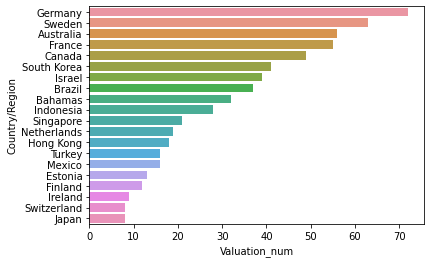

In [40]:
# Create a barplot to compare the top 20 countries with highest company valuations.
### YOUR CODE HERE ###
sns.barplot(data=df_companies_sum_outliers_removed.head(20),
            y='Country/Region',
            x='Valuation_num')

# Show the plot.
### YOUR CODE HERE ###
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Select the top 20 rows in `df_companies_sum_outliers_removed`

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Select the top 20 rows in `df_companies_sum_outliers_removed` by using `head(20)` function.

</details>

### Plot maps

Your investor has also asked for: 
 - A global valuation map of all countries with companies that joined the list after 2020
 - A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` and a separate map for Europe 

To create these, plot the data onto maps. 

You have learned about using `scatter_geo()` from `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the countries with valuation of companies joined after 2020.

In [8]:
# Plot the sum of valuations per country.
### YOUR CODE HERE ###
px.scatter_geo(df_companies_sum[
    df_companies["Year_Joined"]>2020
    ], locations='Country/Region', size='Valuation_num', locationmode='country names', color='Country/Region')

NameError: name 'df_companies_sum' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Filter the `df_companies` by 'Year_Joined'.

</details>

In [5]:
# Plot the sum of valuations per country.
### YOUR CODE HERE ###
fig = px.scatter_geo(df_companies_sum_outliers_removed, 
                     locations='Country/Region', 
                     size='Valuation_num', 
                     locationmode='country names', 
                     color='Country/Region', 
                     title='Global Unicorn Company Values')
# Show the plot.
### YOUR CODE HERE ###
fig.show()

NameError: name 'px' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use the code in the previous step to complete this section.

</details>

**Question: How is the valuation sum per country visualized in the plot?**

- By using circles around the map which represent the -valuation sum- per country

To create the same map for `europe` only, update the `fig` object to add a new title and also limit the scope of the map to `europe`.

In [4]:
# Update the figure layout.
### YOUR CODE HERE ###
fig.update_layout(
    title_text = 'Europe Unicorn Company Values', # Create a Title
    geo_scope='europe',  # Plot only the Europe instead of globe
)

# Show the plot again.
### YOUR CODE HERE ###
fig.show()

NameError: name 'fig' is not defined

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Enter a new text title as string and enter 'europe' to filter `geo_scope`.

</details>

**Question: What steps could you take to further analyze the data?**


- Using merge for related datasets
- Other types of visualization can be considered like map, bar plot etc.

## Conclusion

**What are some key takeaways that you learned during this lab?**
- Missing data is a one of the most common problems for data professionals anytime they work with a data sample.
- Addressing missing values is a part of the data-cleaning process and an important step in EDA.
- Address missing values by either removing them or filling them in.
- When considering how to address missing values, keep in mind the business, the data, and the questions to be answered. Always ensure you are not introducing bias into the dataset.
- Addressing the missing values enabled you to answer your investor's questions.


**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**

* For the industry specific companies in certain locations, a short list of company names and locations can be provided.
* For the top 20 countries by sum of valuations, the plot I created in this lab or share a list can be used. 
- For the top 20 countries sorted by sum of company valuations in each country, countries such as `United States`, `China`, `India`, and `United Kingdom` must be excluded. 
* For the questions concerning the valuation maps, in addition to visuals, a short summary of the data points can be provided. This is because the investor did not request a further breakdown of this data. 



**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

